In [3]:
"""                                                 Electric Vehicle Data Analysis Project

Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
of 400 km.
a) Your task is to filter out EVs that meet these criteria.(2 Marks)
b) Group them by the manufacturer (Make).(6 marks)
c) Calculate the average battery capacity for each manufacturer. (8 Marks)"""
import pandas as pd
EV_df=pd.read_excel("FEV-data-Excel.xlsx")
B_EV=EV_df[(EV_df["Minimal price (gross) [PLN]"]<=350000) & (EV_df["Range (WLTP) [km]"]>400)] 
print(B_EV)

                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

                          Model  Minimal price (gross) [PLN]  \
0             e-tron 55 quattro                       345700   
8                           iX3                       282900   
15          Kona electric 64kWh                       178400   
18             

In [15]:
G_EV=EV_df.groupby("Make")["Battery capacity [kWh]"].mean()
print(G_EV)

Make
Audi             87.000000
BMW              54.800000
Citroën          50.000000
DS               50.000000
Honda            35.500000
Hyundai          47.166667
Jaguar           90.000000
Kia              51.600000
Mazda            35.500000
Mercedes-Benz    85.000000
Mini             28.900000
Nissan           47.333333
Opel             50.000000
Peugeot          50.000000
Porsche          89.850000
Renault          52.000000
Skoda            36.800000
Smart            17.600000
Tesla            86.285714
Volkswagen       61.075000
Name: Battery capacity [kWh], dtype: float64


In [4]:
"""Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)"""


"""Emprical rule the date we are assuming is normal distribution"""
NewEnergy='mean - Energy consumption [kWh/100 km]'
m_NE=EV_df[NewEnergy].mean()
std_NE=EV_df[NewEnergy].std()
ll=m_NE-3*std_NE
hl=m_NE+3*std_NE
outliers = EV_df[(EV_df[NewEnergy] < ll) | (EV_df[NewEnergy] > hl)]

print(outliers[['Car full name', NewEnergy]])

print("\n")
print("\n")
print("\n")

# while considering   (mean-2*std_dev)
NewEnergy='mean - Energy consumption [kWh/100 km]'
m_NE=EV_df[NewEnergy].mean()
std_NE=EV_df[NewEnergy].std()
ll=m_NE-2*std_NE
hl=m_NE+2*std_NE
outliers = EV_df[(EV_df[NewEnergy] < ll) | (EV_df[NewEnergy] > hl)]

print(outliers[['Car full name', NewEnergy]])

Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []






               Car full name  mean - Energy consumption [kWh/100 km]
51  Mercedes-Benz EQV (long)                                    28.2


In [5]:
# Task 2 Alternate method

NewEnergy = 'mean - Energy consumption [kWh/100 km]'
Q1 = EV_df[NewEnergy].quantile(0.25)
Q3 = EV_df[NewEnergy].quantile(0.75)
IQR = Q3 - Q1

outliers = EV_df[(EV_df[NewEnergy] < (Q1 - 1.5 * IQR)) | (EV_df[NewEnergy] > (Q3 + 1.5 * IQR))]
print("Outliers in Energy Consumption:\n", outliers[['Car full name', NewEnergy]])

Outliers in Energy Consumption:
 Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []


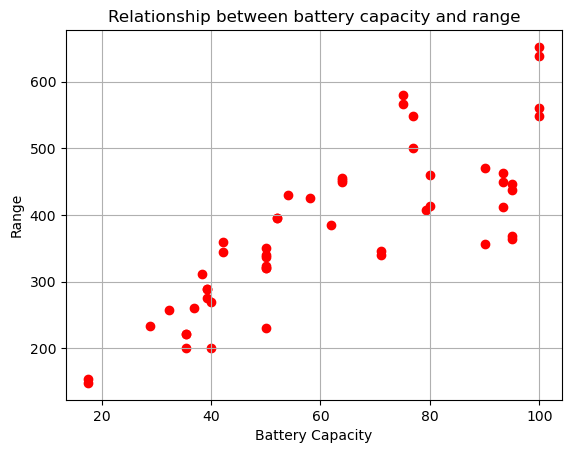

Most of the points align diagonally and there is a positive correlation between battery capacity and range.


In [11]:
"""Task 3: Your manager wants to know if there's a strong RELATIONSHIP between battery
capacity and range.
a) Create a suitable plot to visualize.(8 Marks)
b) Highlight any insights.(8 Marks)"""

import matplotlib.pyplot as plt

plt.scatter(EV_df['Battery capacity [kWh]'],EV_df['Range (WLTP) [km]'],color='red')
plt.title("Relationship between battery capacity and range")
plt.xlabel('Battery Capacity')
plt.ylabel('Range')

plt.grid(True)
plt.show()
print("Most of the points align diagonally and there is a positive correlation between battery capacity and range.")

In [12]:
"""Task 4: Build an EV recommendation class. The class should allow users to input their
budget, desired range, and battery capacity. The class should then return the top three EVs
matching their criteria. (8+8 Marks)"""
class recommendation:
    def __init__(self,EV_df):
        self.EV_df=EV_df
       

    

    def EV_rec(self,budget,D_range,B_Capacity):
        list= self.EV_df[(self.EV_df['Minimal price (gross) [PLN]']<=budget) & (self.EV_df['Range (WLTP) [km]']>=D_range) & (self.EV_df['Battery capacity [kWh]']>=B_Capacity)]
        return list.sort_values(by='Minimal price (gross) [PLN]', ascending=False).head(3)   


r = recommendation(EV_df)
r1 = r.EV_rec(300000, 200, 55)
print("Top 3 EV Recommendations:\n", r1[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]','Battery capacity [kWh]']])

Top 3 EV Recommendations:
                 Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
8                     BMW iX3                       282900                460   
41  Tesla Model 3 Performance                       260490                567   
40   Tesla Model 3 Long Range                       235490                580   

    Battery capacity [kWh]  
8                     80.0  
41                    75.0  
40                    75.0  


In [107]:
"""Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant
difference in the average Engine power [KM] of vehicles manufactured by two leading
manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis.
(Conduct a two sample t-test using ttest_ind from scipy.stats module) (16 Marks)"""

from scipy.stats import ttest_ind
t_data = EV_df[EV_df['Make'] == 'Tesla']['Engine power [KM]']
a_data = EV_df[EV_df['Make'] == 'Audi']['Engine power [KM]']

t_stat, p_value = ttest_ind(t_data, a_data, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Conclusion: There is a significant difference in the average engine power between Tesla and Audi.")
else:
    print("Conclusion:As p value is greater than 0.05.So no significant difference in the average engine power between Tesla and Audi.")


T-Statistic: 1.7939951827297178, P-Value: 0.10684105068839565
Conclusion:As p value is greater than 0.05.So no significant difference in the average engine power between Tesla and Audi.


In [ ]:
                                    """video link"""

"""https://drive.google.com/file/d/1nY3K4Knxpx--Z1Er8wBaReHvxKQYKKNb/view?usp=sharing"""

